# Preprocessing

In [ ]:
!pip install pyfluidsynth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt-get update -y

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 261 kB in 2s (133 kB/s)
Reading package li

In [ ]:
!sudo apt-get install -y fluidsynth

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fluidsynth is already the newest version (1.1.9-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
!pip install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Setup

In [ ]:
import fluidsynth
import collections
import datetime
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Dict, List, Optional, Sequence, Tuple


seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Sampling rate for audio playback
_SAMPLING_RATE = 16000.0

In [ ]:
!mkdir results

mkdir: cannot create directory ‘results’: File exists


### Download the dataset

In [ ]:
data_dir = pathlib.Path('data/maestro-v2.0.0')
if not data_dir.exists():
  tf.keras.utils.get_file(
      'maestro-v2.0.0-midi.zip',
      origin='https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip',
      extract=True,
      cache_dir='.', cache_subdir='data',
  )
filenames = glob.glob(str(data_dir) + '/**/*.mid*')

# from google.colab import files
# uploaded = files.upload()
# filenames = glob.glob('*.mid*')

In [ ]:
print(filenames)
filenames = filenames[:100]
print('Number of files:', len(filenames))

['data/maestro-v2.0.0/2011/MIDI-Unprocessed_24_R1_2011_MID--AUDIO_R1-D9_08_Track08_wav.midi', 'data/maestro-v2.0.0/2011/MIDI-Unprocessed_19_R1_2011_MID--AUDIO_R1-D7_13_Track13_wav.midi', 'data/maestro-v2.0.0/2011/MIDI-Unprocessed_12_R3_2011_MID--AUDIO_R3-D4_03_Track03_wav.midi', 'data/maestro-v2.0.0/2011/MIDI-Unprocessed_10_R1_2011_MID--AUDIO_R1-D4_05_Track05_wav.midi', 'data/maestro-v2.0.0/2011/MIDI-Unprocessed_24_R1_2011_MID--AUDIO_R1-D9_10_Track10_wav.midi', 'data/maestro-v2.0.0/2011/MIDI-Unprocessed_09_R1_2011_MID--AUDIO_R1-D3_12_Track12_wav.midi', 'data/maestro-v2.0.0/2011/MIDI-Unprocessed_07_R1_2011_MID--AUDIO_R1-D3_04_Track04_wav.midi', 'data/maestro-v2.0.0/2011/MIDI-Unprocessed_19_R1_2011_MID--AUDIO_R1-D7_12_Track12_wav.midi', 'data/maestro-v2.0.0/2011/MIDI-Unprocessed_16_R2_2011_MID--AUDIO_R2-D4_09_Track09_wav.midi', 'data/maestro-v2.0.0/2011/MIDI-Unprocessed_06_R1_2011_MID--AUDIO_R1-D2_17_Track17_wav.midi', 'data/maestro-v2.0.0/2011/MIDI-Unprocessed_19_R1_2011_MID--AUDIO_R1-D

### Process a sample file

In [ ]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
    waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
    # Take a sample of the generated waveform to mitigate kernel resets
    waveform_short = waveform[:seconds*int(_SAMPLING_RATE)]
    return display.Audio(waveform_short, rate=_SAMPLING_RATE)


sample_file = filenames[1]
print(sample_file)
pm = pretty_midi.PrettyMIDI(sample_file)
display_audio(pm)

data/maestro-v2.0.0/2011/MIDI-Unprocessed_19_R1_2011_MID--AUDIO_R1-D7_13_Track13_wav.midi


In [ ]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)

Number of instruments: 1
Instrument name: Acoustic Grand Piano


In [ ]:
for i, note in enumerate(instrument.notes[:10]):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=49, note_name=C#3, duration=4.0234
1: pitch=57, note_name=A3, duration=3.7786
2: pitch=52, note_name=E3, duration=4.0339
3: pitch=61, note_name=C#4, duration=0.7526
4: pitch=64, note_name=E4, duration=1.0391
5: pitch=40, note_name=E2, duration=16.0612
6: pitch=45, note_name=A2, duration=16.0156
7: pitch=69, note_name=A4, duration=5.7214
8: pitch=37, note_name=C#2, duration=16.4909
9: pitch=57, note_name=A3, duration=0.0729


In [ ]:
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [ ]:
raw_notes = midi_to_notes(sample_file)
raw_notes.head()

,pitch,start,end,step,duration
0,37,1.020833,17.511719,0.000000,16.490885
1,40,1.205729,17.266927,0.184896,16.061198
2,45,1.385417,17.401042,0.179688,16.015625
3,49,1.528646,5.552083,0.143229,4.023438
4,52,1.725260,5.759115,0.196615,4.033854


In [ ]:
get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
sample_note_names[:10]

array(['C#2', 'E2', 'A2', 'C#3', 'E3', 'A3', 'C#4', 'E4', 'A4', 'A4'],
      dtype='<U3')

In [ ]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

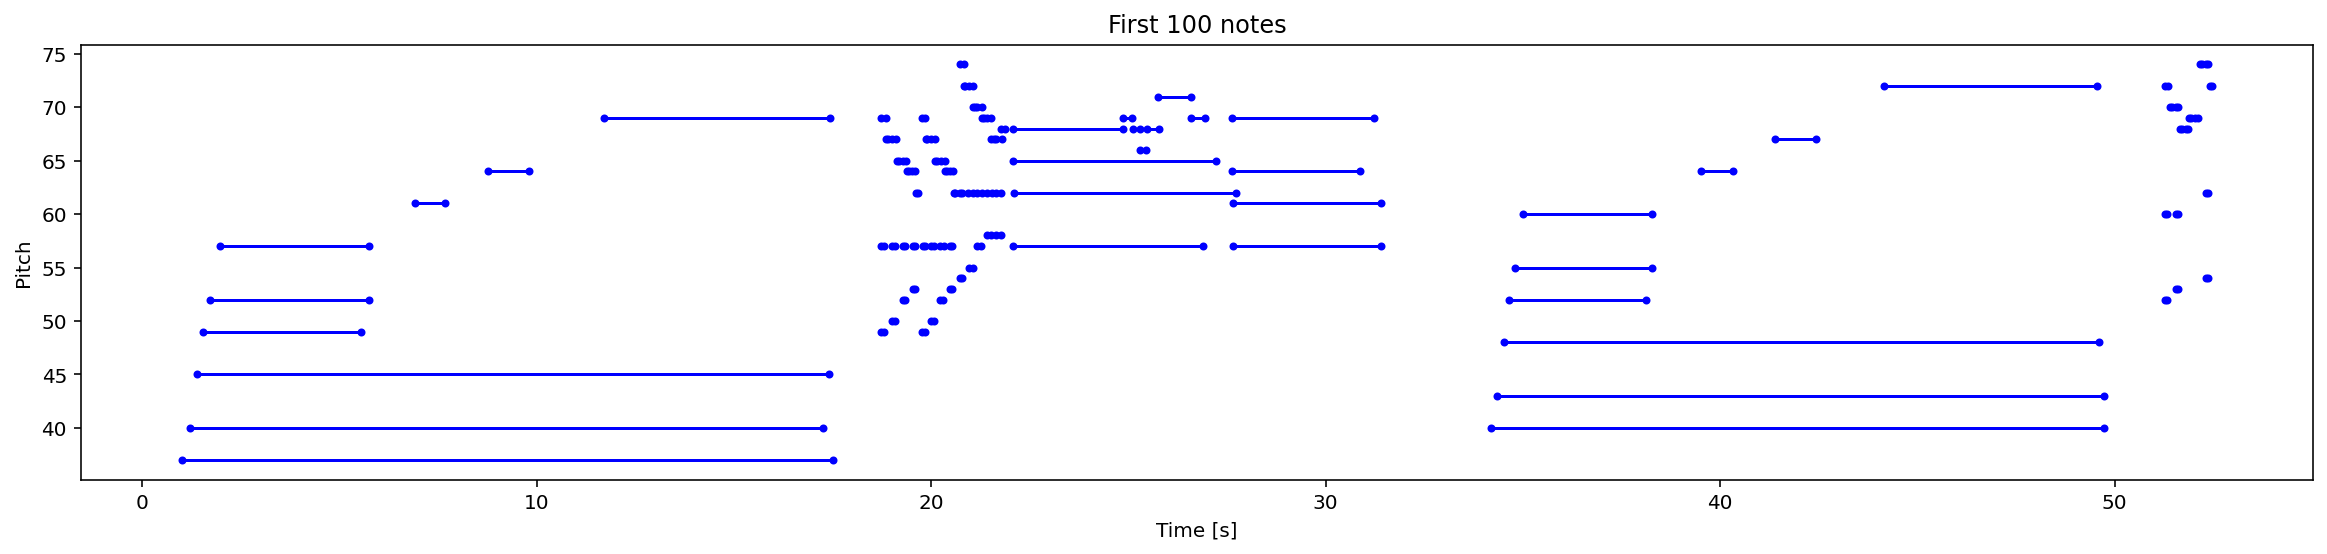

In [ ]:
plot_piano_roll(raw_notes, count=100)

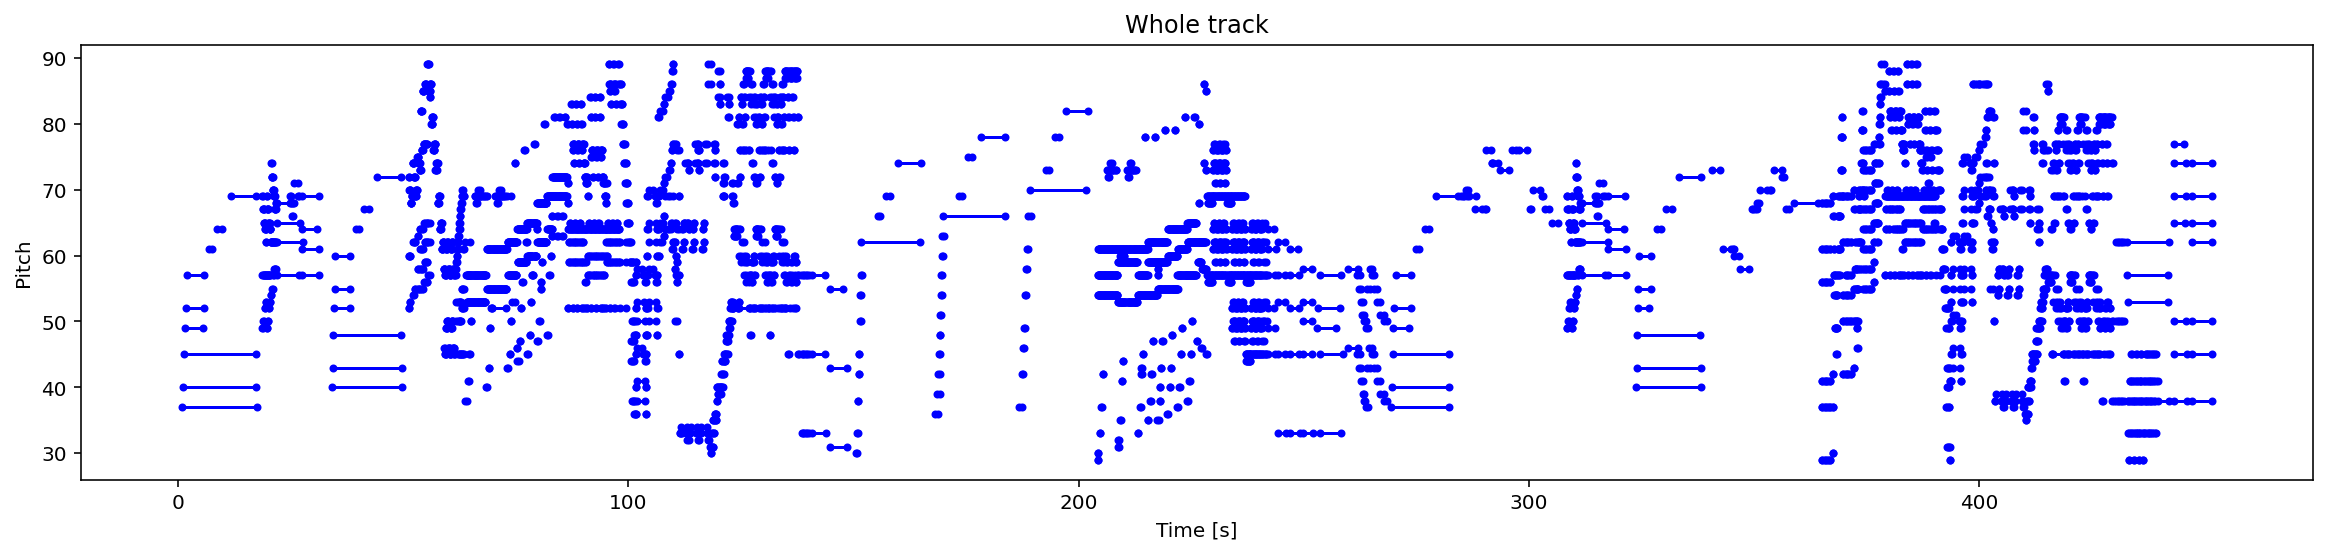

In [ ]:
plot_piano_roll(raw_notes)

In [ ]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 3, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 3, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))

  plt.subplot(1, 3, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

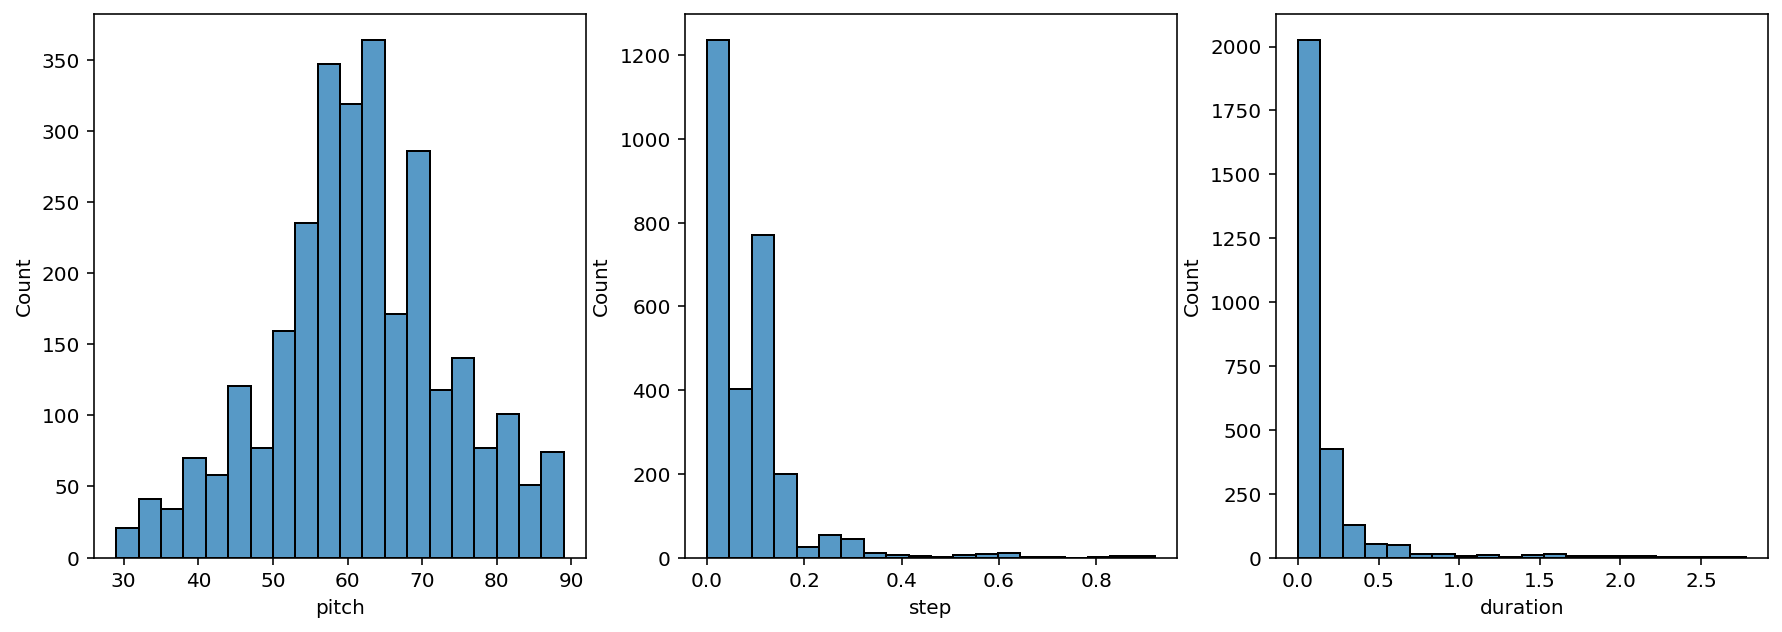

In [ ]:
plot_distributions(raw_notes)

In [ ]:
#-------------- CREATE MIDI--------------
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str,
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

example_file = 'example.midi'
example_pm = notes_to_midi(
    raw_notes, out_file=example_file, instrument_name=instrument_name)

In [ ]:
display_audio(example_pm)

In [ ]:
#----------------------------------------------------------------

from music21 import converter, note, chord, instrument
import glob
import re

# Maps pitches and note durations to their corresponding input midi file


class PlayedNote:
    def __init__(self, note, duration):
        self.note = note
        self.duration = duration

    def __str__(self):
        return f'note: {self.note}, duration: {self.duration}'

def parse_midi_data(file):
    midi_data = {}
    min_duration = 100
    notes = []
    duration = []

    midi = converter.parse(file)
    notes_to_parse = None
    instrument_parts = instrument.partitionByInstrument(midi)
    if instrument_parts:  # File is partitioned by instrument
        notes_to_parse = instrument_parts.parts[0].recurse()
    else:
        notes_to_parse = midi.flat.notes
    for elem in notes_to_parse:
        if isinstance(elem, note.Note):
            notes.append(str(elem.pitch.midi))
            duration.append(elem.duration.quarterLength)
            if elem.duration.quarterLength < min_duration:
                min_duration = elem.duration.quarterLength
        elif isinstance(elem, chord.Chord):
            notes.append('.'.join(str(n) for n in elem.normalOrder))
            duration.append(elem.duration.quarterLength)
    if len(notes) != 0:  # Filter out songs with no notes and chords
        cleaned_file_name = 'uhuhuhu.mid' # re.findall(r'edm_midi\\(.*)\.mid', str(file))[0]
        midi_data[cleaned_file_name] = [None] * len(notes)
        for i in range(len(notes)):
            midi_data[cleaned_file_name][i] = PlayedNote(notes[i], duration[i])
    return midi_data[cleaned_file_name] # midi_data

In [ ]:
from PIL import Image, ImageDraw

def generate_image(song_data):
    length = 0

    width = len(song_data) #96 było
    for note in song_data:
        length += note.duration
    img = Image.new(mode = "RGB", size = (128, width))
    drawer = ImageDraw.Draw(img)
    current_index = 0
    image_num = 0
    for note in song_data:
        for sub_note in note.note.split("."):
            drawer.line([(current_index, width - int(sub_note)), (current_index + note.duration * 4, width - int(sub_note))], fill = (255, 255, 255))
        # img.show()
        current_index += note.duration * 4

        if current_index % 96 != current_index:
            current_index = 0
            img.save(f'sample{image_num}.png') #(f'edm_images/{name.replace(" ", "_")}_{image_num}.png')
            image_num += 1
            img = Image.new(mode = "RGB", size = (128, 96))
            drawer = ImageDraw.Draw(img)
    img.show()
    img.save(f'sample{image_num}.png') #(f'edm_images/{name.replace(" ", "_")}_{image_num}.png')

In [ ]:
sample_song_data = parse_midi_data(sample_file)
print(sample_song_data)
generate_image(sample_song_data)

[<__main__.PlayedNote object at 0x7fd765581100>, <__main__.PlayedNote object at 0x7fd7f4b4f8e0>, <__main__.PlayedNote object at 0x7fd7620af6a0>, <__main__.PlayedNote object at 0x7fd7620af6d0>, <__main__.PlayedNote object at 0x7fd7620af0d0>, <__main__.PlayedNote object at 0x7fd7620af640>, <__main__.PlayedNote object at 0x7fd7646532b0>, <__main__.PlayedNote object at 0x7fd764653130>, <__main__.PlayedNote object at 0x7fd764653280>, <__main__.PlayedNote object at 0x7fd764653340>, <__main__.PlayedNote object at 0x7fd7646533a0>, <__main__.PlayedNote object at 0x7fd764653400>, <__main__.PlayedNote object at 0x7fd764653460>, <__main__.PlayedNote object at 0x7fd7646534c0>, <__main__.PlayedNote object at 0x7fd764653520>, <__main__.PlayedNote object at 0x7fd764653580>, <__main__.PlayedNote object at 0x7fd7646535e0>, <__main__.PlayedNote object at 0x7fd764653640>, <__main__.PlayedNote object at 0x7fd7646536a0>, <__main__.PlayedNote object at 0x7fd764653700>, <__main__.PlayedNote object at 0x7fd764

# Model

In [ ]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
from __future__ import print_function, division
from music21 import converter, instrument, note, chord, stream
from keras.layers import Input, Dense, Reshape, Dropout, CuDNNLSTM, Bidirectional
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import np_utils

def get_notes():
    """ Get all the notes and chords from the midi files """
    notes = []

    for file in filenames:
        midi = converter.parse(file)

        print("Parsing %s" % file)

        notes_to_parse = None

        try: # file has instrument parts
            s2 = instrument.partitionByInstrument(midi)
            notes_to_parse = s2.parts[0].recurse()
        except: # file has notes in a flat structure
            notes_to_parse = midi.flat.notes

        for element in notes_to_parse:
            if isinstance(element, note.Note):
                notes.append(str(element.pitch))
            elif isinstance(element, chord.Chord):
                notes.append('.'.join(str(n) for n in element.normalOrder))

    return notes

def prepare_sequences(notes, n_vocab):
    """ Prepare the sequences used by the Neural Network """
    sequence_length = 100

    # Get all pitch names
    pitchnames = sorted(set(item for item in notes))

    # Create a dictionary to map pitches to integers
    note_to_int = dict((note, number) for number, note in enumerate(pitchnames))

    network_input = []
    network_output = []

    # create input sequences and the corresponding outputs
    for i in range(0, len(notes) - sequence_length, 1):
        sequence_in = notes[i:i + sequence_length]
        sequence_out = notes[i + sequence_length]
        network_input.append([note_to_int[char] for char in sequence_in])
        network_output.append(note_to_int[sequence_out])

    n_patterns = len(network_input)

    # Reshape the input into a format compatible with LSTM layers
    network_input = np.reshape(network_input, (n_patterns, sequence_length, 1))

    # Normalize input between -1 and 1
    network_input = (network_input - float(n_vocab)/2) / (float(n_vocab)/2)
    network_output = np_utils.to_categorical(network_output)

    return (network_input, network_output)

def generate_notes(model, network_input, n_vocab):
    """ Generate notes from the neural network based on a sequence of notes """
    # pick a random sequence from the input as a starting point for the prediction
    start = np.random.randint(0, len(network_input)-1)

    # Get pitch names and store in a dictionary
    pitchnames = sorted(set(item for item in notes))
    int_to_note = dict((number, note) for number, note in enumerate(pitchnames))

    pattern = network_input[start]
    prediction_output = []

    # generate 500 notes
    for note_index in range(500):
        prediction_input = np.reshape(pattern, (1, len(pattern), 1))
        prediction_input = prediction_input / float(n_vocab)

        prediction = model.predict(prediction_input, verbose=0)

        index = np.argmax(prediction)
        result = int_to_note[index]
        prediction_output.append(result)

        pattern = np.append(pattern,index)
        #pattern.append(index)
        pattern = pattern[1:len(pattern)]

    return prediction_output

def create_midi(prediction_output, filename):
    """ convert the output from the prediction to notes and create a midi file
        from the notes """
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for item in prediction_output:
        pattern = item[0]
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                new_note = note.Note(int(current_note))
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
        # pattern is a note
        else:
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 0.5

    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='results/{}.mid'.format(filename))

class GAN():
    def __init__(self, rows):
        self.seq_length = rows
        self.seq_shape = (self.seq_length, 1)
        self.latent_dim = 1000
        self.disc_loss = []
        self.gen_loss =[]
        self.accuracy = []

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates note sequences
        z = Input(shape=(self.latent_dim,))
        generated_seq = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(generated_seq)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_discriminator(self):

        model = Sequential()
        model.add(CuDNNLSTM(512, input_shape=self.seq_shape, return_sequences=True))
        model.add(Bidirectional(CuDNNLSTM(512)))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        seq = Input(shape=self.seq_shape)
        validity = model(seq)

        return Model(seq, validity)

    def build_generator(self):

        model = Sequential()
        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.seq_shape), activation='tanh'))
        model.add(Reshape(self.seq_shape))
        model.summary()

        noise = Input(shape=(self.latent_dim,))
        seq = model(noise)

        return Model(noise, seq)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load and convert the data
        notes = get_notes()
        n_vocab = len(set(notes))
        X_train, y_train = prepare_sequences(notes, n_vocab)

        # Adversarial ground truths
        real = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        # Training the model
        for epoch in range(epochs):

            # Training the discriminator
            # Select a random batch of note sequences
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            real_seqs = X_train[idx]

            #noise = np.random.choice(range(484), (batch_size, self.latent_dim))
            #noise = (noise-242)/242
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a batch of new note sequences
            gen_seqs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(real_seqs, real)
            d_loss_fake = self.discriminator.train_on_batch(gen_seqs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


            #  Training the Generator
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Train the generator (to have the discriminator label samples as real)
            g_loss = self.combined.train_on_batch(noise, real)

            # Print the progress and save into loss lists
            if epoch % sample_interval == 0:
              print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
              self.disc_loss.append(d_loss[0])
              self.gen_loss.append(g_loss)
              self.accuracy.append(100*d_loss[1])

        for i in range(30):
          self.generate(notes, n_vocab, filename='gan_final'+str(i))
        self.plot_loss()
        self.generator.save('results/my_model')


    def generate(self, input_notes, n_vocab, filename='gan_final'):
        # Get pitch names and store in a dictionary
        notes = input_notes
        pitchnames = sorted(set(item for item in notes))
        int_to_note = dict((number, note) for number, note in enumerate(pitchnames))

        # Use random noise to generate sequences
        noise = np.random.normal(0, 1, (1, self.latent_dim))
        predictions = self.generator.predict(noise)

        # pred_notes = [x*242+242 for x in predictions[0]]
        pred_notes = [((x+1)*(n_vocab)/2) for x in predictions[0]]
        pred_notes = [int_to_note[int(x)] for x in pred_notes]

        create_midi(pred_notes, filename)

    def plot_loss(self):
        plt.plot(self.disc_loss, c='red')
        plt.plot(self.gen_loss, c='blue')
        plt.title("GAN Loss per Epoch")
        plt.legend(['Discriminator', 'Generator'])
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.savefig('results/GAN_Loss_per_Epoch_final.png', transparent=True)
        plt.show()

    def plot_accuracy(self):
        plt.plot(self.accuracy)
        plt.title("Accuracy per Epoch")
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.savefig('results/Accuracy_per_Epoch_final.png', transparent=True)
        plt.show()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_6 (CuDNNLSTM)    (None, 100, 512)          1054720   
                                                                 
 bidirectional_3 (Bidirectio  (None, 1024)             4202496   
 nal)                                                            
                                                                 
 dense_21 (Dense)            (None, 512)               524800    
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 256)               0         
                                                      

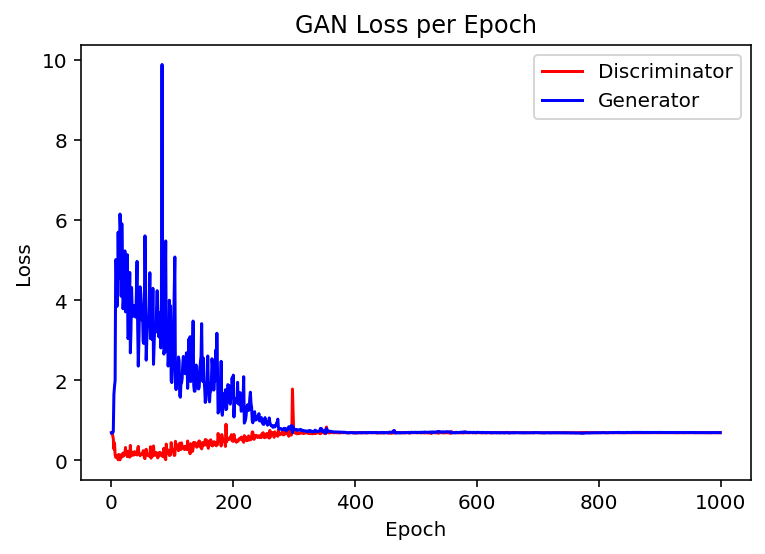

In [ ]:
gan = GAN(rows=100)
gan.train(epochs=1000, batch_size=32, sample_interval=1)

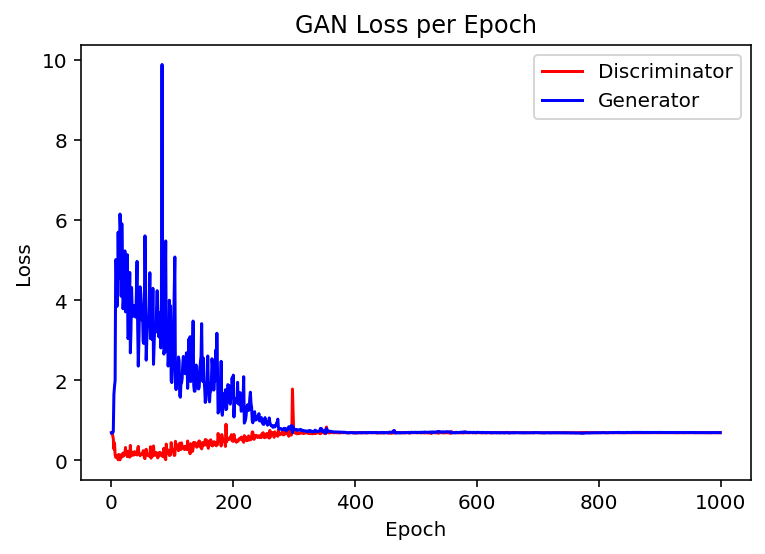

In [ ]:
gan.plot_loss()

In [ ]:
!zip -r /content/results.zip /content/results

  adding: content/results/ (stored 0%)
  adding: content/results/gan_final8.mid (deflated 75%)
  adding: content/results/gan_final13.mid (deflated 73%)
  adding: content/results/gan_final28.mid (deflated 73%)
  adding: content/results/gan_final12.mid (deflated 72%)
  adding: content/results/gan_final11.mid (deflated 77%)
  adding: content/results/gan_final5.mid (deflated 74%)
  adding: content/results/gan_final23.mid (deflated 76%)
  adding: content/results/gan_final14.mid (deflated 74%)
  adding: content/results/gan_final22.mid (deflated 73%)
  adding: content/results/gan_final17.mid (deflated 79%)
  adding: content/results/gan_final3.mid (deflated 72%)
  adding: content/results/gan_final20.mid (deflated 72%)
  adding: content/results/gan_final21.mid (deflated 76%)
  adding: content/results/gan_final25.mid (deflated 73%)
  adding: content/results/gan_final7.mid (deflated 74%)
  adding: content/results/gan_final24.mid (deflated 74%)
  adding: content/results/gan_final10.mid (deflated 7

In [ ]:
from google.colab import files
files.download('/content/results.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>